<span style="font-size: 34px;">SHORTEST JOB FIRST</span>

In [157]:
import matplotlib.pyplot as plt




In [158]:
# please edit the values as you see fit

processes = [
    {'process_id': 'A', 'arrival_time': 0, 'burst_time': 8},
    {'process_id': 'B', 'arrival_time': 3, 'burst_time': 4},
    {'process_id': 'C', 'arrival_time': 4, 'burst_time': 5},
    {'process_id': 'D', 'arrival_time': 6, 'burst_time': 3},
    {'process_id': 'E', 'arrival_time': 10, 'burst_time': 2}
]

In [159]:
def sjf_scheduling(processes):
    processes.sort(key=lambda x: x['arrival_time'])

    ready_queue = []
    current_time = 0
    completed_processes = []

    while processes or ready_queue:
        # Arrival time
        for process in processes:
            if process['arrival_time'] <= current_time:
                ready_queue.append(process)
                processes.remove(process)

        # Burst Time
        if ready_queue:
            ready_queue.sort(key=lambda x: x['burst_time'])
            current_process = ready_queue.pop(0)

            # Calculate waiting time and turnaround time
            current_process['waiting_time'] = current_time - current_process['arrival_time']
            current_process['turnaround_time'] = current_process['waiting_time'] + current_process['burst_time']

            current_time += current_process['burst_time']
            completed_processes.append(current_process)

    # Calculate average waiting time and turnaround time
    waiting_time = sum(process['waiting_time'] for process in completed_processes)
    turnaround_time = sum(process['turnaround_time'] for process in completed_processes)
    avg_waiting_time = waiting_time / len(completed_processes)
    avg_turnaround_time = turnaround_time / len(completed_processes)

    return completed_processes, avg_waiting_time, avg_turnaround_time

<span style="font-size: 34px;">Gantt Chart Prettier</span>

In [160]:
def display_gantt_chart(processes):
    process_ids = [process['process_id'] for process in processes]
    arrival_times = [process['arrival_time'] for process in processes]
    burst_times = [process['burst_time'] for process in processes]

    # Calculate completion times
    completion_times = [arrival_time + burst_time for arrival_time, burst_time in zip(arrival_times, burst_times)]

    # to make it colorful
    norm = plt.Normalize(min(completion_times), max(completion_times))
    cmap = plt.cm.get_cmap('summer')  
    colors = [cmap(norm(completion_time)) for completion_time in completion_times]

    plt.figure(figsize=(10, 5))
    plt.barh(process_ids, burst_times, left=arrival_times, color=colors, linewidth=2)  # left is arrival_time, width is burst_time
    plt.xlabel('Time')
    plt.ylabel('Process')
    plt.title('SJF Scheduling Gantt Chart')
    plt.grid(True)
    plt.show()

<span style="font-size: 34px;">Performing FCFS Scheduling</span>

In [161]:
scheduled_processes, avg_waiting_time, avg_turnaround_time = sjf_scheduling(processes)

In [162]:
print("Process ID\tArrival Time\tBurst Time\tWaiting Time\tTurnaround Time")
for process in scheduled_processes:
    print(f"{process['process_id']}\t\t{process['arrival_time']}\t\t{process['burst_time']}\t\t{process['waiting_time']}\t\t{process['turnaround_time']}")
print(f"Average Waiting Time: {avg_waiting_time:.2f}")
print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")

Process ID	Arrival Time	Burst Time	Waiting Time	Turnaround Time
A		0		8		0		8
D		6		3		2		5
B		3		4		8		12
E		10		2		5		7
C		4		5		13		18
Average Waiting Time: 5.60
Average Turnaround Time: 10.00


<span style="font-size: 34px;">Gantt Chart</span>

C:\Users\USER\AppData\Local\Temp\ipykernel_16052\4102549425.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('summer')


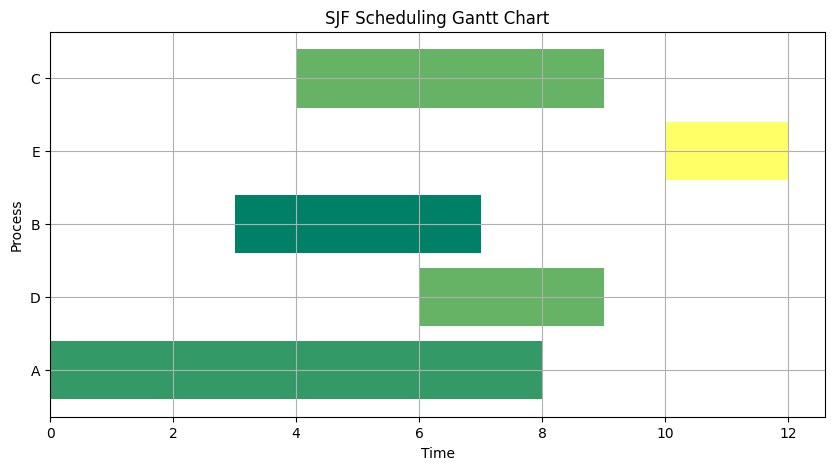

In [163]:
display_gantt_chart(scheduled_processes)